<a href="https://colab.research.google.com/github/Bao3333/MachineLearning/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

以前: tensorflow + keras

現在: tensorflow 2

a. keras直接被吃進去了 from keras.xxx import -> from tensorflow.keras.xxx import

b. 妳再也不用安裝tensorflow-gpu(你只要有裝cuda(nvidia gpu driver))

In [1]:
from tensorflow.keras.datasets.mnist import load_data
# ((訓練資料, 訓練答案), (測試資料, 測試答案))
(x_train, y_train), (x_test, y_test) = load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
# 看一下資料的形狀
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
# 看一下第一筆訓練資料的樣子
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


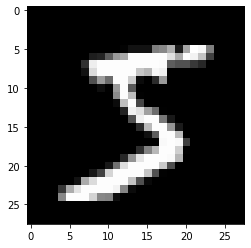

In [4]:
# 把他畫成圖片來看看
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# cmap="PiYG" -> "PiYG_r" <- 圖片可以換顏色,在想要的顏色後面加上 _r 可以讓0-255的顏色反轉
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap="gray")

In [5]:
# 基底(Model): Sequential(一定是一層疊一層上面), Model(你想怎麼疊都可以)
# 層(Layer): Dense(全連接層)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 設置層
# bias: 每一層有多少個輸出, 就有多少個激活函式, 就有多少個bias(bias將每個輸出的threshhold調到同一基準)
layers = [
    # 784 * 128 + 128(bias) = 100480
    Dense(128, activation="relu", input_dim=784),
    # 128 * 10 + 10(bias) = 1290
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 輸出一個(二元)： ACT -> sigmoid  loss -> binary crossentropy(plog1/q + (1-p)log1/(1-q))
# 輸出多個:
# (多元互斥): ACY -> softmax  loss -> categorical crossentropy(p1log1/q1 + p2log1/q2 + ......)
# (多元不互斥): 照二元選
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
#      ↓確定模型的東西 ↓選擇loss的計算方式
model.compile(loss=CategoricalCrossentropy(),
#                ↓選擇優化器 Adam結合動量優化與時間優化
              optimizer=Adam(),
#                ↓除了loss以外順便輸出準確率讓我們參考
              metrics=["accuracy"]
)

In [7]:
# 對答案(y)做One-Hot Encoding
from tensorflow.keras.utils import to_categorical
#                                        ↓設定做出幾個類別的One-Hot Encoding,避免答案有缺少類別會出錯
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
import numpy as np
test = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
# -1可以根據你另外一編要設定的值,自動計算要填補的值
test.reshape(3, -1)
test.reshape(3, 2)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [9]:
# 對題目(x)做處理: 攤開 -> normalize(為了不讓輸入的值和比重係數差距太大,tensorflow規定輸入的直要介於 0~1 or -1~1)
x_train_norm = x_train.reshape(60000, 784) / 255.0
x_test_norm = x_test.reshape(10000, 784) / 255.0

In [10]:
# batch_size: 看多少筆做一次梯度下降(把所有筆的斜率做一個平均, 圖片較大的話就看少一點就做, 圖片較小的話就看多一點做即可)
# epochs: 整份資料(60000筆), 你總共看幾次 -> 參考書讀幾遍的概念
# 270調整 = (60000*0.9) / 200 -> 270
# validation_split: 切多少%作為我的測試資料(10%)
# loss/accuracy: 54000筆訓練資料的數值
# cal_loss/val_accuracy: 6000筆測試資料數值
# !!! 看val_loss的平滑度來決定epochs
# !!! 過擬合 -> 不要無腦的一直訓練(train loss會變低), 但對於沒看過的資料表現並不會比較好(val_loss變高)
#                                        ↓自動幫你看Val_loss的平滑度幫你設定epchos的停止點
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#                                                       ↑將設定好的model儲存成檔案
# ↓patience -> 設定val_loss幾次調整後沒有下降就停止 / restore_best_weights -> 回到val_loss最好的那次係數 / ".h5"是一種副檔名 / save_best_only -> 只存val_loss最好的那一次
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("mlp.h5", save_best_only=True)
]
# 不想要進度條可加參數 -> verbose = 2
model.fit(x_train_norm,
          y_train_cat,
          batch_size=200,
          epochs=50,
          validation_split=0.1,
          callbacks=callbacks 
)

Epoch 1/50
270/270 [==============================] - 6s 8ms/step - loss: 0.4346 - accuracy: 0.8825 - val_loss: 0.1963 - val_accuracy: 0.9478
Epoch 2/50
270/270 [==============================] - 2s 6ms/step - loss: 0.2060 - accuracy: 0.9424 - val_loss: 0.1467 - val_accuracy: 0.9608
Epoch 3/50
270/270 [==============================] - 2s 7ms/step - loss: 0.1502 - accuracy: 0.9565 - val_loss: 0.1198 - val_accuracy: 0.9680
Epoch 4/50
270/270 [==============================] - 1s 4ms/step - loss: 0.1186 - accuracy: 0.9658 - val_loss: 0.1028 - val_accuracy: 0.9712
Epoch 5/50
270/270 [==============================] - 1s 4ms/step - loss: 0.0980 - accuracy: 0.9717 - val_loss: 0.0981 - val_accuracy: 0.9725
Epoch 6/50
270/270 [==============================] - 1s 3ms/step - loss: 0.0820 - accuracy: 0.9767 - val_loss: 0.0847 - val_accuracy: 0.9755
Epoch 7/50
270/270 [==============================] - 1s 4ms/step - loss: 0.0701 - accuracy: 0.9800 - val_loss: 0.0839 - val_accuracy: 0.9763
Epoch 

In [11]:
# 用沒看過的一萬筆作最終評估
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0755 - accuracy: 0.9775


[0.07553974539041519, 0.9775000214576721]

In [12]:
# 用confusion metrics來看準確率和召回率
# 準確率Precision: 你說是正的有多少真的是正的
# 召回率Recall: 真的是正的有多少被你找出來
# 準確率和召回率沒辦法兩全其美(一個講求精準一個講求不錯放)
from sklearn.metrics import confusion_matrix
# 將每筆預測的10個預測值挑最高的出來
pre= model.predict(x_test_norm).argmax(axis=1)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
             columns=[f"{i}(predict)" for i in range(10)],
             index=[f"{i}(true)" for i in range(10)])

,0(predict),1(predict),2(predict),3(predict),4(predict),5(predict),6(predict),7(predict),8(predict),9(predict)
0(true),969,0,0,3,1,1,3,1,2,0
1(true),0,1126,4,0,0,1,1,1,2,0
2(true),5,2,1000,1,3,0,3,9,9,0
3(true),0,0,3,984,0,4,0,7,10,2
4(true),1,0,1,1,967,0,1,4,2,5
5(true),2,0,0,7,1,868,6,1,6,1
6(true),3,3,1,1,3,4,941,1,1,0
7(true),1,2,5,1,0,0,0,1015,0,4
8(true),4,1,3,4,5,5,2,6,943,1
9(true),4,4,0,5,13,6,0,11,4,962


In [13]:
import numpy as np
# argmax() 示範
example = np.array([
    [0.1, 0.7],
    [0.3, 0.9],
    [0.5, 0.8]
])

# 預設會將矩陣攤開
print(example.argmax())
# axis=0會看直的
print(example.argmax(axis=0))
# axis=1會看橫的
print(example.argmax(axis=1))

3
[2 1]
[1 1 1]


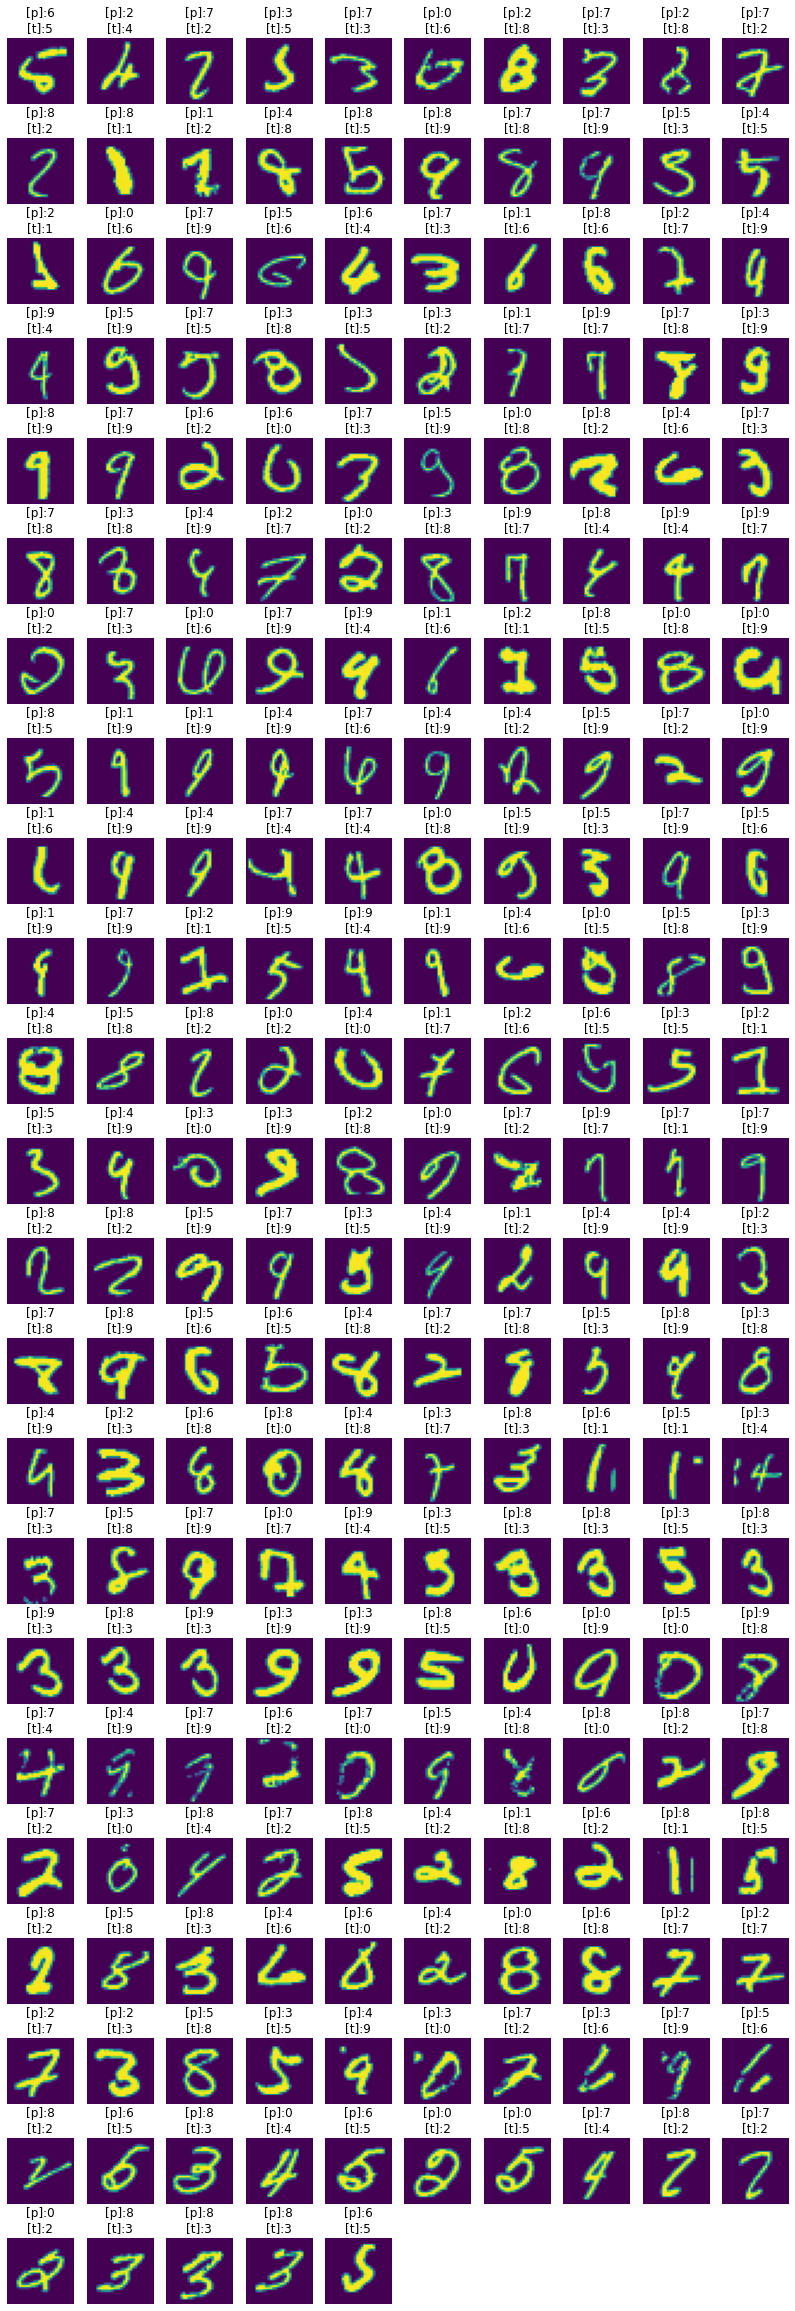

In [14]:
#把錯的圖畫出來
# subplot(總高度, 總寬度, ith[1,2,3])
# (2, 3, 1) (2, 3, 2) (2, 3, 3)
# (2, 3, 4) (2, 3, 5) (2, 3, 6)
import matplotlib.pyplot as plt
plt.figure(figsize=(14,42))

idx = np.nonzero(pre != y_test)[0]
false_pre = pre[idx]
false_true = y_test[idx]
false_img = x_test[idx]

width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
  plt.subplot(height, width, i+1)
  title=f"[p]:{false_pre[i]}\n[t]:{false_true[i]}"
  plt.title(title)
  plt.axis("off")
  plt.imshow(false_img[i])

In [15]:
# f1 score -> 利用調和平均取準確率和召回率平衡 -> 對付imbalance dataset